In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100

In [3]:
img,s,h,v = ('','','','')
def load_img():
    global img,s,h,v
    img = cv2.imread('data/2.jpeg')
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    rimg,gimg,bimg = cv2.split(img)
    hsvimg = cv2.cvtColor(img,cv2.COLOR_RGB2HSV)
    h,s,v = cv2.split(hsvimg)

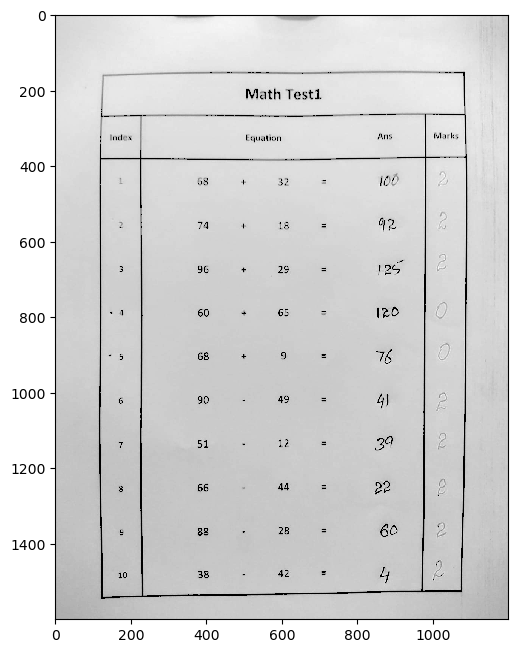

In [4]:
load_img()
v[v < 100] = 0
plt.imshow(v,'gray')

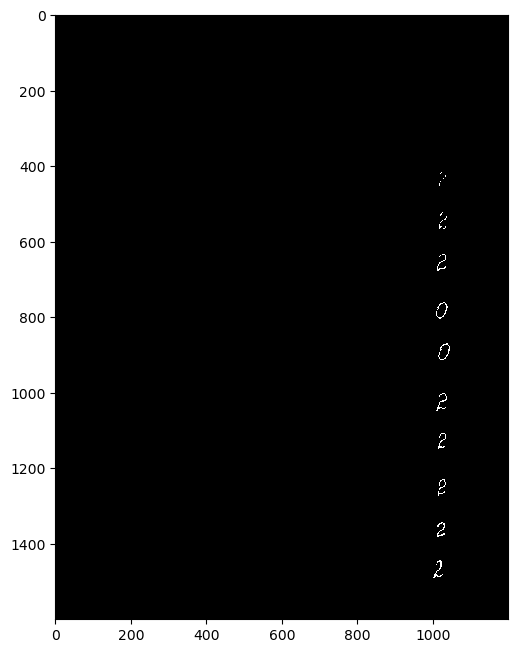

In [7]:
load_img()
u_red = np.array([255,100,100])
l_red = np.array([100,0,0])
mask = cv2.inRange(img,l_red,u_red)
blur = cv2.medianBlur(mask,3)
plt.imshow(blur,'gray')

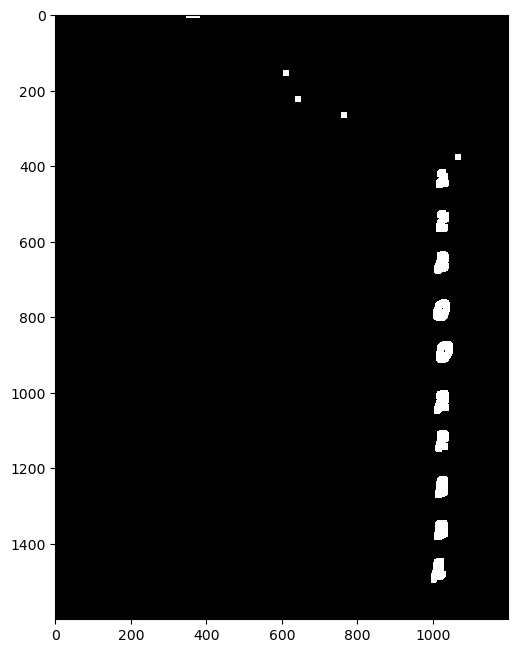

In [8]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(15,15))
dilation = cv2.dilate(blur,kernel,1)
plt.imshow(dilation,'gray')

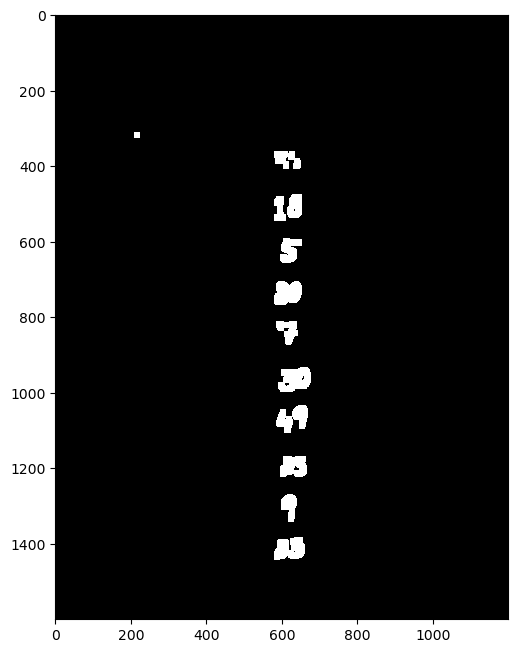

In [10]:
from skimage import morphology
rmimg = morphology.remove_small_objects(dilation.astype(bool),min_size=100,connectivity=2).astype(np.uint8)*255
plt.imshow(rmimg,'gray')

In [11]:
# arr = np.nonzero(rmimg)
# l_range = arr[1].min()
# h_range = arr[1].max()

arr = np.nonzero(blur)
unique,counts = np.unique(arr[1],return_counts=True)
center = unique[np.argmax(counts == counts.max())]
l_range = center - 50
h_range = center + 50
# counts = dict(zip(unique,counts))
# print(counts)

In [11]:
print(unique[np.argmax(counts == counts.max())])

1007


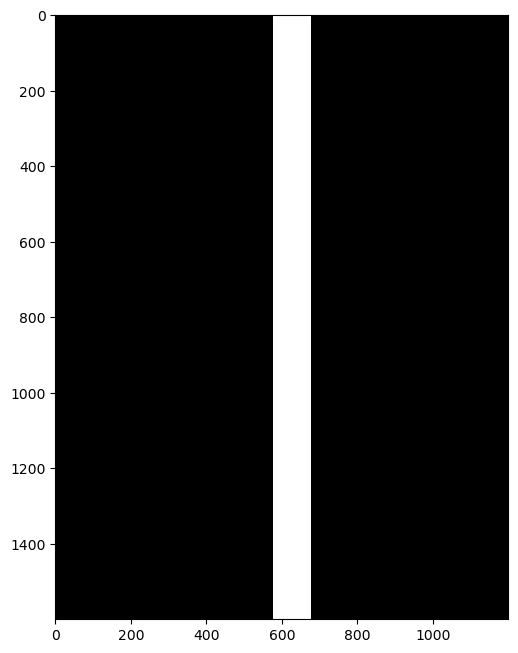

In [12]:
blur[:,:]=0
blur[:,l_range:h_range] = 255
plt.imshow(blur,'gray')

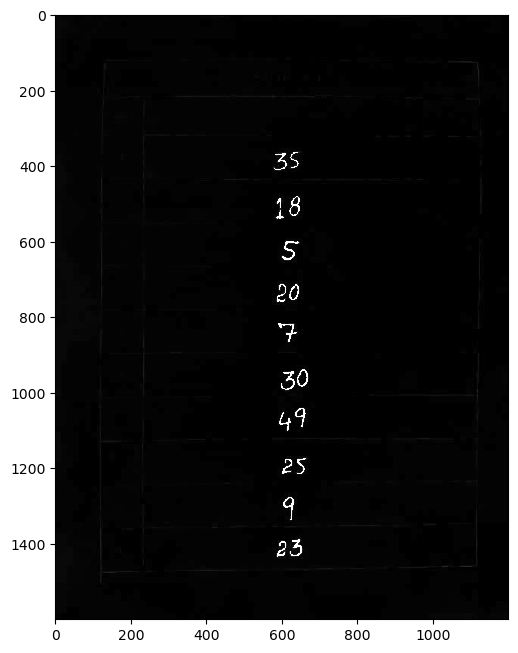

In [13]:
# rimg = cv2.bitwise_and(blur,s)
s[s>50]= 250
plt.imshow(s,'gray')

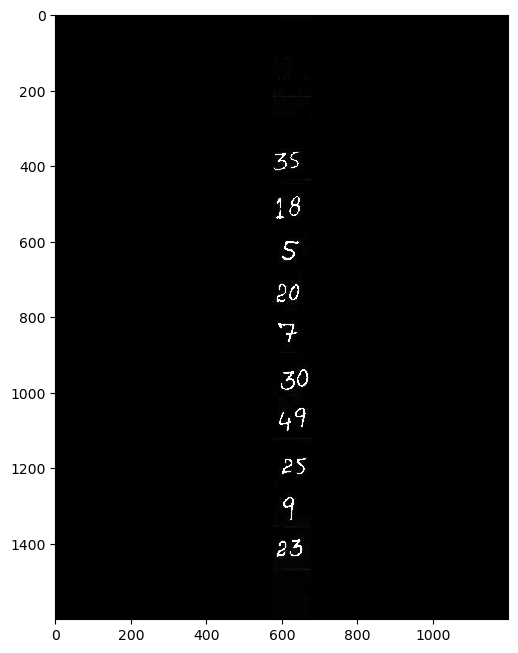

In [14]:
outimg = cv2.bitwise_and(blur,s)
plt.imshow(outimg,'gray')

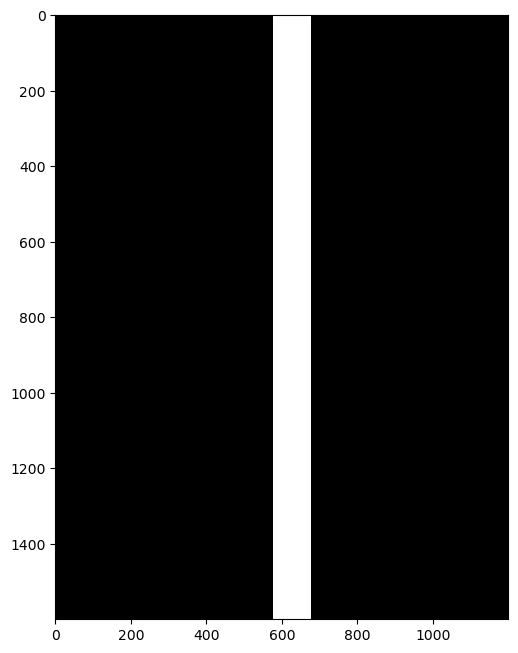

In [15]:
blur[:,blur.any(0)] = 255
# tb.astype(np.uint8)
plt.imshow(blur,'gray')

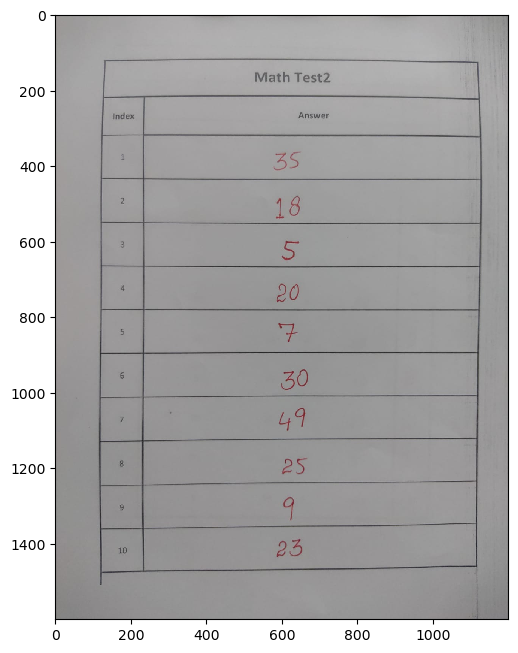

In [16]:
# plt.imshow((rimg > 100 & gimg < 100 & bimg < 100),'gray')
plt.imshow(img,'gray')

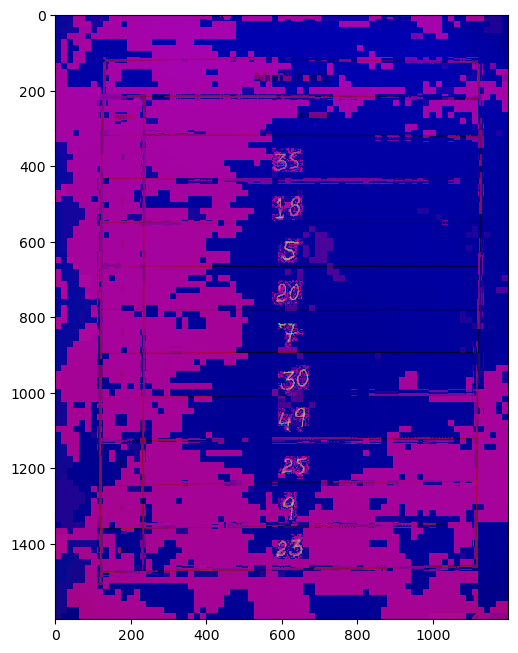

In [17]:
hsvimg = cv2.cvtColor(img,cv2.COLOR_RGB2HSV)
plt.imshow(hsvimg)

In [113]:
h,s,v = cv2.split(hsvimg)

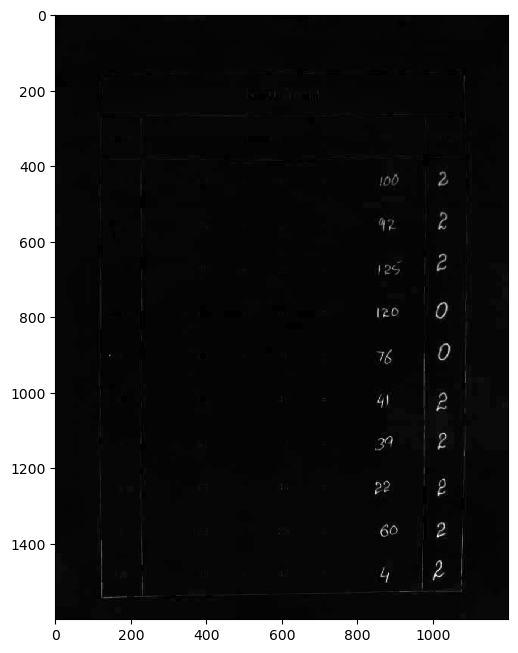

In [114]:

plt.imshow(s,'gray')